In [1]:
import pandas as pd
import numpy as np

In [20]:
RANDOM_STATE = 42

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv("train.csv")
sample = pd.read_csv('sample.csv')

#loading CSV files into the dataframe

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train_final = train.drop(columns=['Loan_ID'])
test_final = test.drop(columns=['Loan_ID'])

#removing not important columns 

In [6]:
print('Train File')
print()
print(train_final.isna().sum())
print()
print()
print('Test File')
print()
print(test_final.isna().sum())

#checking if any values are missing

Train File

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Test File

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
train_final['Gender'].fillna(train_final['Gender'].mode()[0],inplace=True)
train_final['Married'].fillna(train_final['Married'].mode()[0],inplace=True)
train_final['Dependents'].fillna('0',inplace=True)
train_final['Self_Employed'].fillna(train_final['Self_Employed'].mode()[0],inplace=True)
train_final['Loan_Amount_Term'].fillna(train_final['Loan_Amount_Term'].mode()[0],inplace=True)
train_final['Credit_History'].fillna(train_final['Credit_History'].mode()[0],inplace=True)

test_final['Gender'].fillna(test_final['Gender'].mode()[0],inplace=True)
test_final['Married'].fillna(test_final['Married'].mode()[0],inplace=True)
test_final['Dependents'].fillna('0',inplace=True)
test_final['Self_Employed'].fillna(test_final['Self_Employed'].mode()[0],inplace=True)
test_final['Loan_Amount_Term'].fillna(test_final['Loan_Amount_Term'].mode()[0],inplace=True)
test_final['Credit_History'].fillna(test_final['Credit_History'].mode()[0],inplace=True)

#Data processing for the missing values --1

In [8]:
train_final = train_final.dropna()
test_final['LoanAmount'].fillna(test_final['LoanAmount'].mean(),inplace=True) 

#Data processing for the missing values --2

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

<AxesSubplot:xlabel='LoanAmount'>

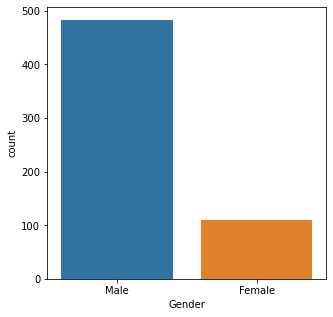

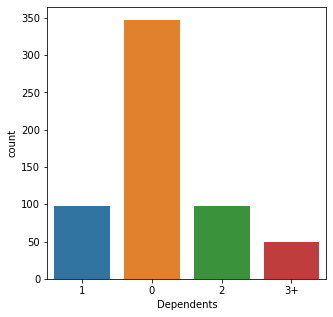

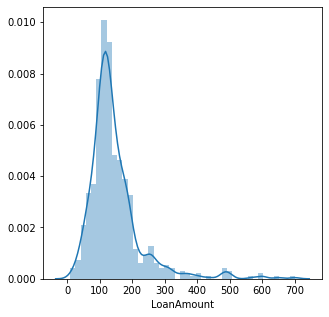

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(train_final['Gender'])

plt.figure(figsize=(5,5))
sns.countplot(train_final['Dependents'])

plt.figure(figsize=(5,5))
sns.distplot(train_final['LoanAmount'])

#data visualization

In [12]:
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_dependent = LabelEncoder()
le_education = LabelEncoder()
le_employed = LabelEncoder()
le_property = LabelEncoder()
le_loan = LabelEncoder()

#loadning and assigning Label Encoder Library

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train_final['Gender'] = le_gender.fit_transform(train_final['Gender'])
train_final['Married'] = le_married.fit_transform(train_final['Married'])
train_final['Dependents'] = le_dependent.fit_transform(train_final['Dependents'])
train_final['Education'] = le_education.fit_transform(train_final['Education'])
train_final['Self_Employed'] = le_employed.fit_transform(train_final['Self_Employed'])
train_final['Property_Area'] = le_property.fit_transform(train_final['Property_Area'])
train_final['Loan_Status'] = le_loan.fit_transform(train_final['Loan_Status'])

test_final['Gender'] = le_gender.fit_transform(test_final['Gender'])
test_final['Married'] = le_married.fit_transform(test_final['Married'])
test_final['Dependents'] = le_dependent.fit_transform(test_final['Dependents'])
test_final['Education'] = le_education.fit_transform(test_final['Education'])
test_final['Self_Employed'] = le_employed.fit_transform(test_final['Self_Employed'])
test_final['Property_Area'] = le_property.fit_transform(test_final['Property_Area'])

#Converting character variable to numerical variable 

In [19]:
x = train_final.iloc[:,0:-1]
y = train_final['Loan_Status'].values

x_val = test_final

#dividing the data set into train and test splits

In [18]:
 from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=RANDOM_STATE)

### Machine Learning Model(s)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
pred_dt = dt.predict(x_test)
score_dt = accuracy_score(y_test,pred_dt)

In [57]:
rf = RandomForestClassifier(max_features=5,
                        )
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=5)

In [60]:
pred_rf = rf.predict(x_test)
score_rf = accuracy_score(y_test,pred_rf)

In [64]:
gb = GradientBoostingClassifier(learning_rate=0.2,  n_estimators= 400)
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=400)

In [66]:
pred_gb = gb.predict(x_test)
score_gb = accuracy_score(y_test,pred_gb)

In [68]:
logr = LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [70]:
pred_logr = logr.predict(x_test)
score_logr = accuracy_score(y_test,pred_logr)

0.7058823529411765

In [81]:
knn = KNeighborsClassifier(n_neighbors=15,
                        weights='uniform')
knn.fit(x_train,y_train)                        

KNeighborsClassifier(n_neighbors=15)

In [82]:
pred_knn = knn.predict(x_test)
score_knn = accuracy_score(y_test,pred_knn)

0.6470588235294118